**INTEGRANTES:**

Felipe Carvalho RA: 147911

Mariana Furtado RA: 150209

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip uninstall tensorflow
!pip install tensorflow==2.12.0

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
  Fil

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import learning_curve
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scipy.stats import randint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from keras.callbacks import ReduceLROnPlateau, EarlyStopping






# 1. Dominio da Aplicação

## 1.1. Bases utilizadas

Vamos utilizar um conjunto de dados obtido na plataforma Kaggle encontrado a partir da plataforma IEEEDataPort. Este conjunto específico contém informações de 70.000 pacientes, cada um descrito por 12 características diferentes.

## 1.2. Exploração dos dados

A base de dados utilizada no projeto contém informações detalhadas sobre os participantes. Cada registro na base de dados corresponde a um indivíduo único, identificado por um número exclusivo. A seguir, descrevem-se as colunas presentes na base de dados, juntamente com seus respectivos significados, tipos de dados e possíveis valores:

**id:**Identificação única do indivíduo. Tipo: inteiro (int).

**age:** Idade do indivíduo em dias. Tipo: inteiro (int).

**height:** Altura do indivíduo em centímetros. Tipo: inteiro (int).

**weight:** Peso do indivíduo em quilogramas. Tipo: ponto flutuante (float).

**gender:** Gênero do indivíduo, representado por valores categóricos. Tipo: categórico. Possíveis valores: [1: Feminino, 2: Masculino].

**ap_hi:** Pressão arterial sistólica medida em milímetros de mercúrio (mmHg). Tipo: inteiro (int).

**ap_lo:** Pressão arterial diastólica medida em milímetros de mercúrio (mmHg). Tipo: inteiro (int).

**cholesterol:** Nível de colesterol, classificado em três categorias. Tipo: categórico. Possíveis valores: [1: Normal, 2: Acima do normal, 3: Muito acima do normal].

**gluc:** Nível de glicose, classificado em três categorias. Tipo: categórico. Possíveis valores: [1: Normal, 2: Acima do normal, 3: Muito acima do normal].

**smoke:** Indica se o indivíduo é fumante. Tipo: categórico. Possíveis valores: [0: Não é fumante, 1: É fumante].

**alco:** Indica se o indivíduo consome álcool. Tipo: categórico. Possíveis valores: [0: Não ingere, 1: Ingere].

**active:** Indica se o indivíduo pratica atividade física regularmente. Tipo: categórico. Possíveis valores: [0: Pratica, 1: Não pratica].

**cardio:** Indica a presença de doença cardiovascular. Tipo: categórico. Possíveis valores: [0: Não tem, 1: Tem].


Nosso objetivo será predizer a coluna 'cardio'

In [6]:
# Importando o dataframe
full_data = pd.read_csv('/content/cardio_train.csv', delimiter=';')

In [7]:
# 5 primeiras linhas
full_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
#Descrição dos dados (Número de linhas, tipo e nome de cada atributo e o número de valores não nulos)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [9]:
#número total das colunas/atributos
full_data.columns.values.shape

(13,)

In [10]:
#nome de todas as colunas/atributos
full_data.columns.values

array(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype=object)

In [11]:
#verificando as categorias de cada atributo categórico do dataframe
full_data['gender'].value_counts()

,count
gender,
1,45530
2,24470


In [12]:
full_data['cholesterol'].value_counts()

,count
cholesterol,
1,52385
2,9549
3,8066


In [13]:
full_data['gluc'].value_counts()

,count
gluc,
1,59479
3,5331
2,5190


In [14]:
full_data['alco'].value_counts()

,count
alco,
0,66236
1,3764


In [15]:
full_data['active'].value_counts()

,count
active,
1,56261
0,13739


In [16]:
full_data['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


In [17]:
#resumo dos atributos numéricos
full_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


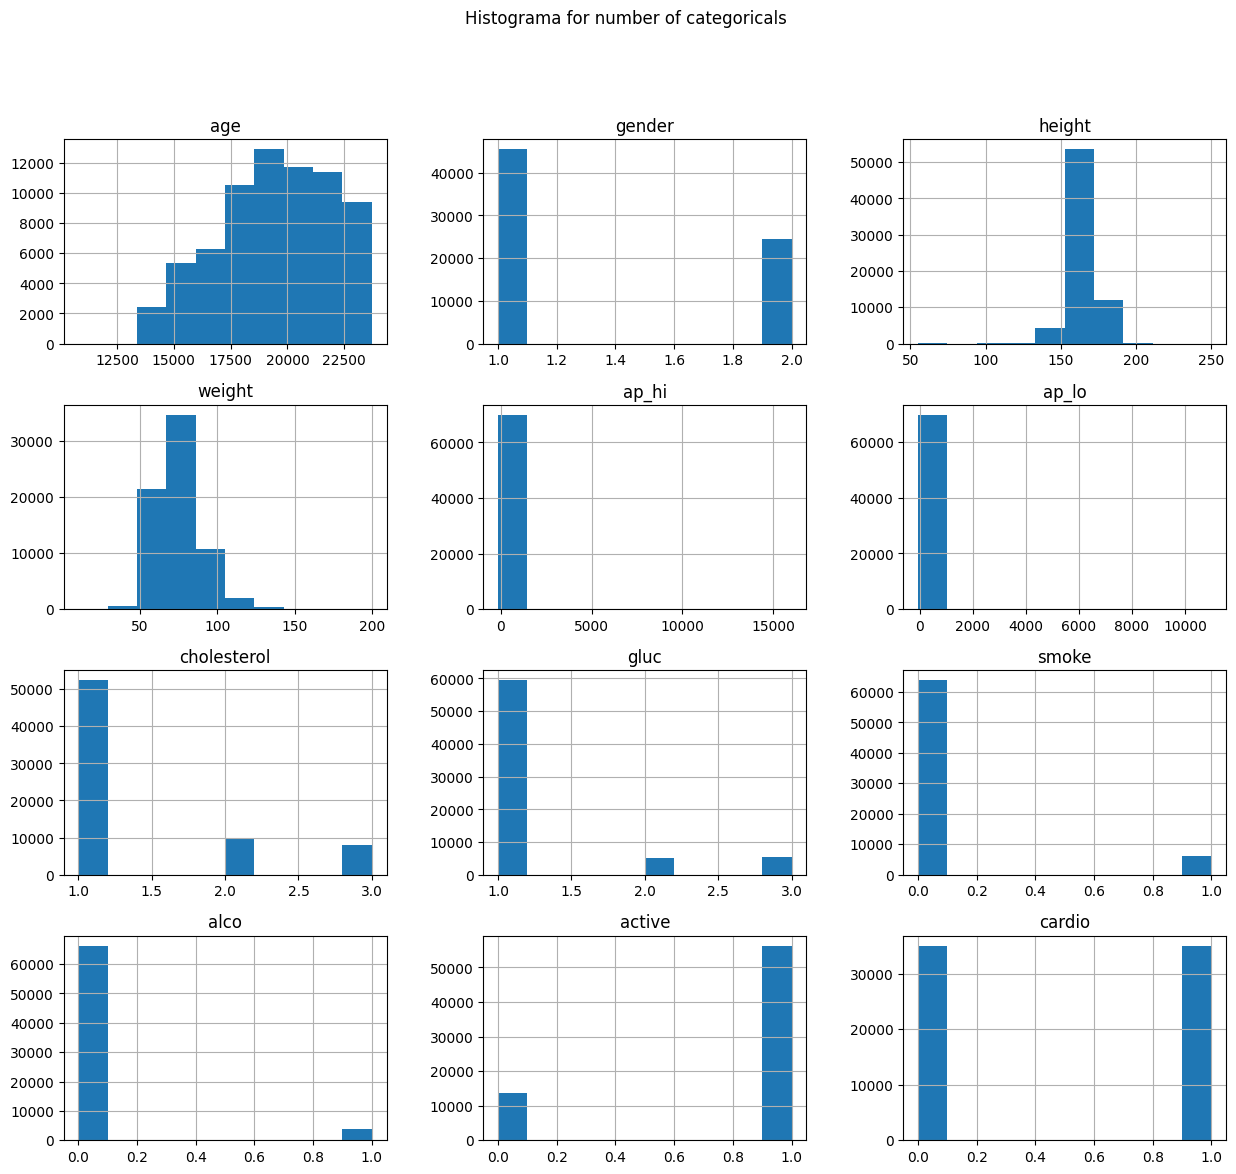

In [18]:
#histograma para cada atributo numérico.
#número de instâncias no eixo vertical (y) que apresentam um determinado intervalo de valores no eixo horizontal(x)

full_data.drop('id', axis=1).hist( figsize=(15,13))
plt.suptitle('Histograma for number of categoricals')
plt.show()

<Axes: >

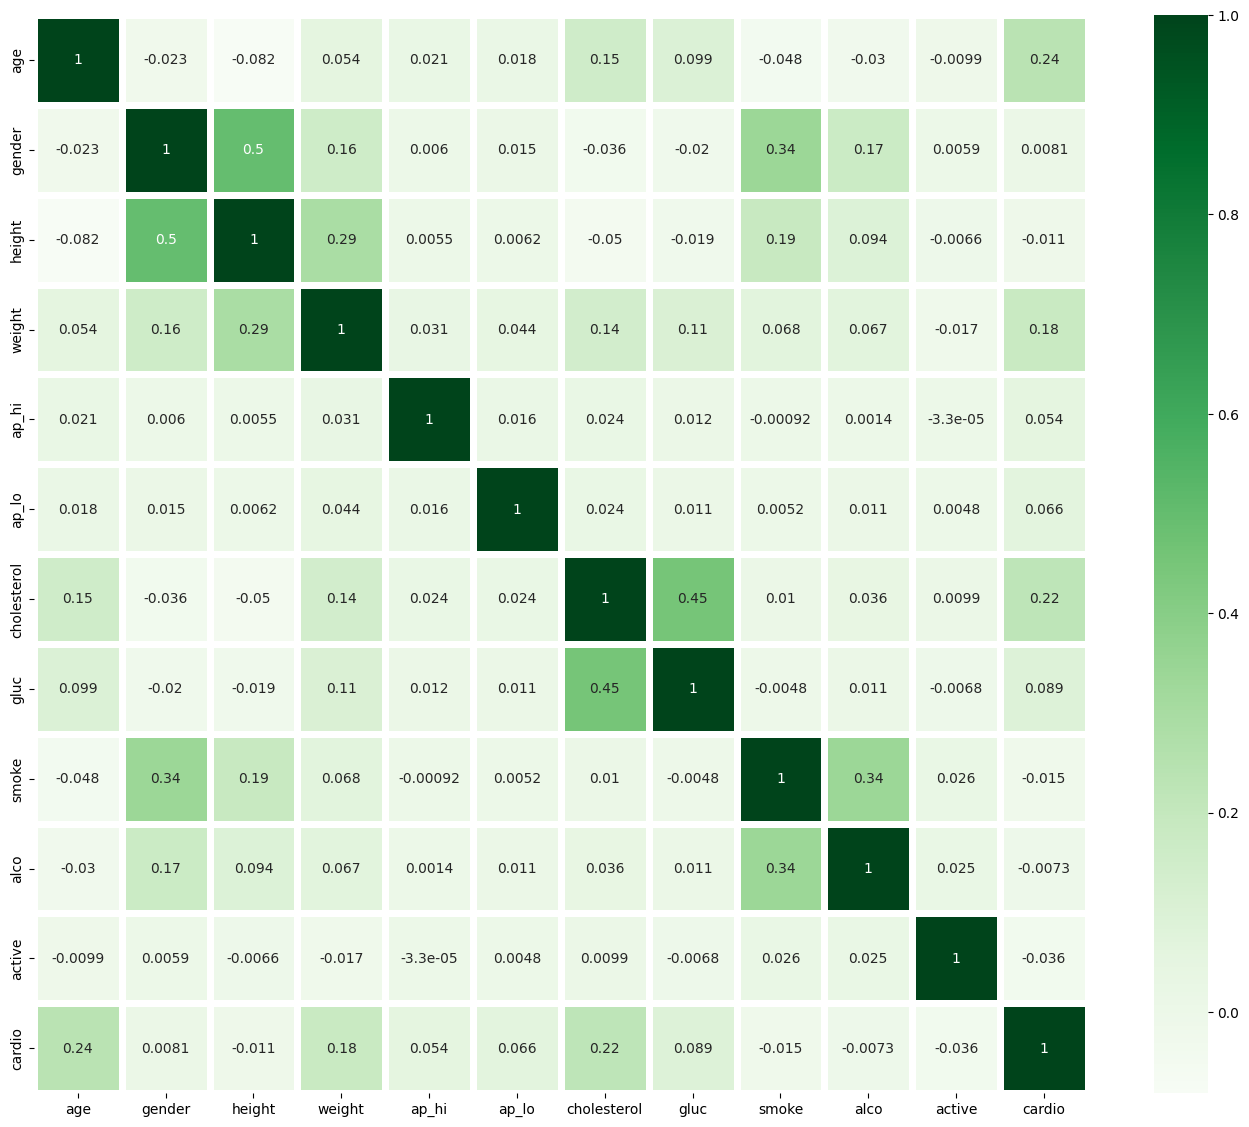

In [19]:
#matriz de correlação
corr_matrix = full_data.drop('id', axis=1).corr(method='pearson')
plt.figure(figsize=(17,14))
sns.heatmap(corr_matrix, annot=True,cmap = sns.color_palette("Greens", as_cmap=True), linewidths = 5)

# 2. Pré-processamento

## 2.1. Limpeza dos dados

In [20]:
# Checando se há dados duplicados
print(f"number of dublicate values is : {full_data.duplicated().sum()}")

number of dublicate values is : 0


In [21]:
# Checando dados se há faltantes
full_data.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [22]:
#verificando se há 0 nas colunas 'age', 'height', 'weight', 'gender, 'ap_hi', 'ap_lo', 'cholesterol '
zeros_sum = (full_data== 0).sum()
print(zeros_sum)

id                 1
age                0
gender             0
height             0
weight             0
ap_hi              0
ap_lo             21
cholesterol        0
gluc               0
smoke          63831
alco           66236
active         13739
cardio         35021
dtype: int64


In [23]:
filtered_data = full_data[full_data['ap_lo'] == 0]
filtered_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2014,2845,22712,2,167,59.0,906,0,1,1,0,0,1,0
13489,19258,14965,2,150,60.0,130,0,1,1,0,0,0,0
16459,23512,20457,1,156,50.0,138,0,3,1,0,0,1,1
17381,24837,18226,1,164,78.0,138,0,1,1,0,0,1,0
22923,32749,21182,2,166,68.0,149,0,1,1,0,0,1,1
23867,34120,16131,1,161,92.0,906,0,2,1,0,0,1,1
25454,36325,17952,2,176,73.0,12,0,1,1,0,0,1,0
27686,39577,23396,2,180,73.0,140,0,1,1,1,1,1,1
31783,45400,16070,1,170,64.0,907,0,1,1,0,0,1,0
38370,54780,23208,2,170,81.0,148,0,1,1,0,0,1,0


In [24]:
#retirando do dataframe onde a coluna 'ap_lo' é zero
full_data = full_data[full_data['ap_lo'] != 0]

In [25]:
filtered_data = full_data[full_data['ap_lo'] == 0]
filtered_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [26]:
#verificando se há dados onde a pressão diastólica (ap_lo) é maior que a pressão sistólica (ap_hi)
filtered_data = full_data[full_data['ap_lo'] > full_data['ap_hi']]
filtered_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


In [27]:
#apagando os dados onde a pressão diastólica (ap_lo) é maior que a pressão sistólica (ap_hi) pois isso não pode acontecer
full_data = full_data[full_data['ap_lo'] <= full_data['ap_hi']]

In [28]:
filtered_data = full_data[full_data['ap_lo'] > full_data['ap_hi']]
filtered_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [29]:
#verificando se há colunas com valores negativos no dataframe

colunas_negativas = full_data.columns[(full_data < 0).any()]
print("Colunas com valores negativos:", colunas_negativas.tolist())

Colunas com valores negativos: ['ap_lo']


In [30]:
linhas_com_negativos = full_data[(full_data < 0).any(axis=1)]
print(linhas_com_negativos)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
60106  85816  22571       1     167    74.0     15    -70            1     1   

       smoke  alco  active  cardio  
60106      0     0       1       1  


In [31]:
#transformando o valor negativo em positivo
full_data['ap_lo'] = full_data['ap_lo'].abs()


In [32]:
colunas_negativas = full_data.columns[(full_data < 0).any()]
print("Colunas com valores negativos:", colunas_negativas.tolist())

Colunas com valores negativos: []


In [33]:
#verificando outliers das colunas ap_lo e ap_li

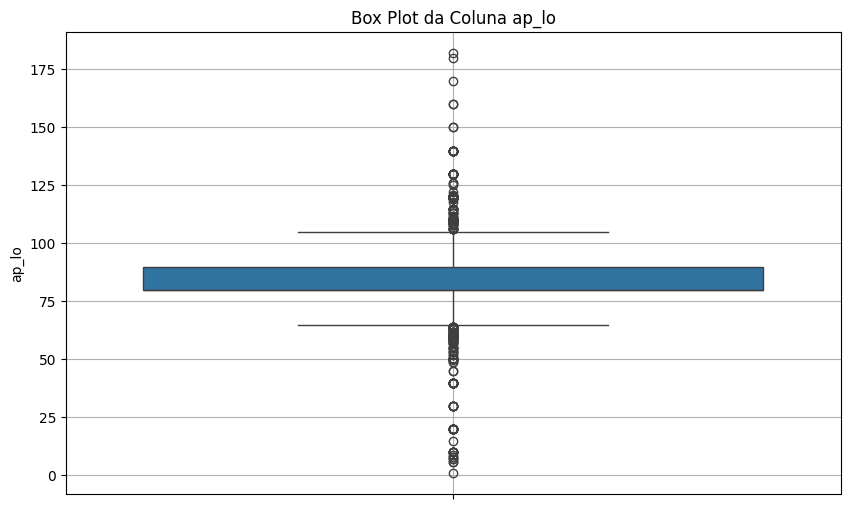

In [34]:

plt.figure(figsize=(10, 6))
sns.boxplot(y='ap_lo', data=full_data)

# Adicione títulos e rótulos
plt.title('Box Plot da Coluna ap_lo')

# Mostre o gráfico
plt.grid(True)
plt.show()


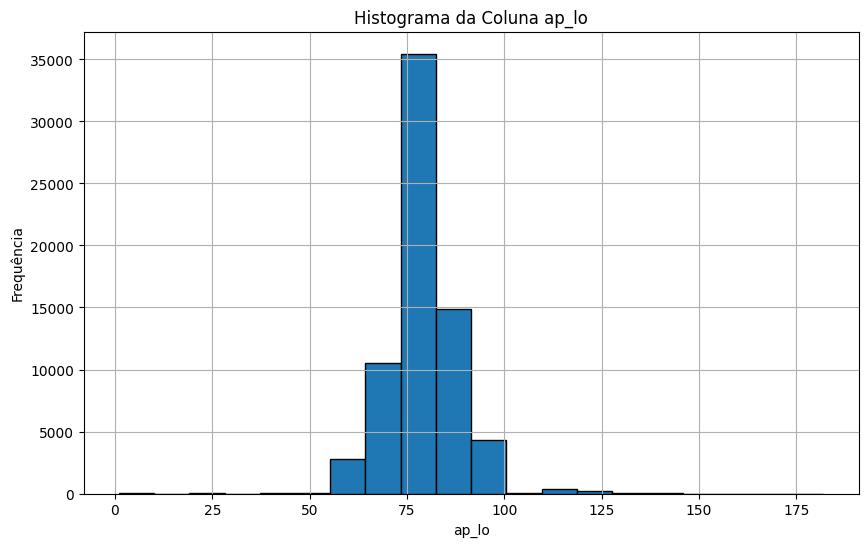

In [35]:

plt.figure(figsize=(10, 6))
plt.hist(full_data['ap_lo'], bins=20, edgecolor='black')

# Adicione títulos e rótulos
plt.title('Histograma da Coluna ap_lo')
plt.xlabel('ap_lo')
plt.ylabel('Frequência')

# Mostre o gráfico
plt.grid(True)
plt.show()


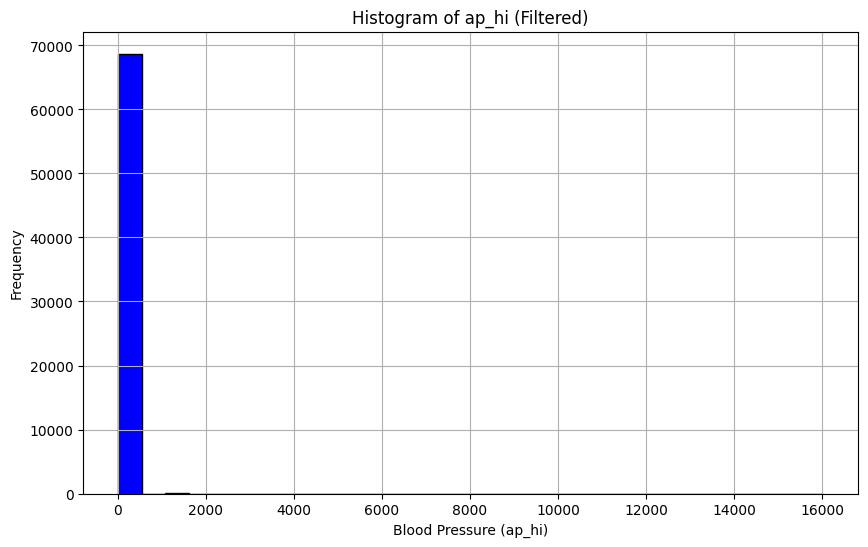

In [36]:

plt.figure(figsize=(10, 6))
plt.hist(full_data['ap_hi'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of ap_hi (Filtered)')
plt.xlabel('Blood Pressure (ap_hi)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

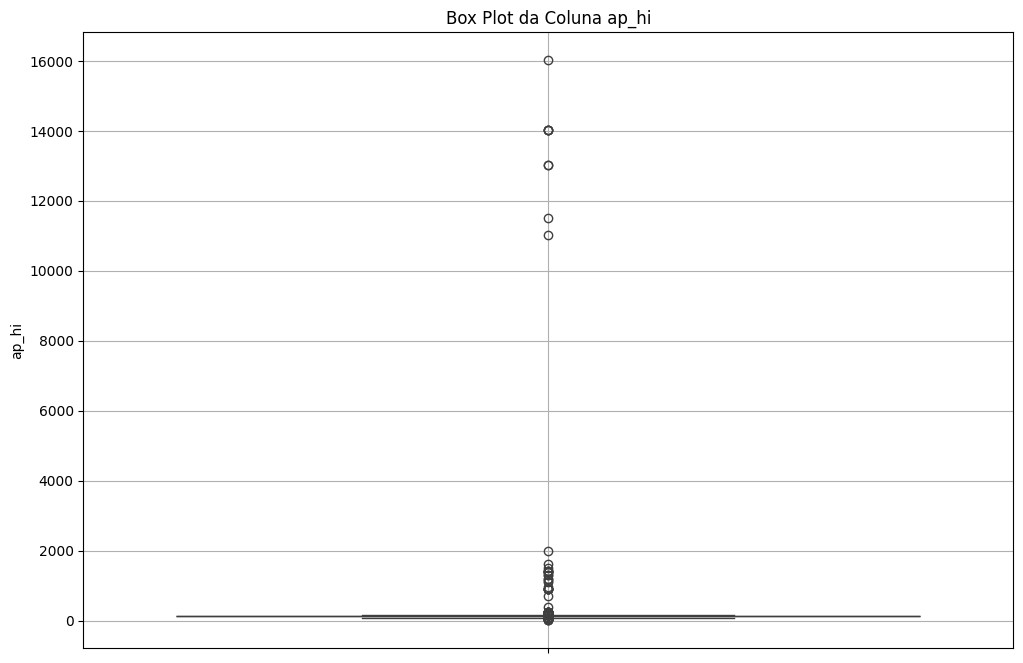

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Criar o box plot
sns.boxplot(y=full_data['ap_hi'])

# Adicionar título e rótulo
plt.title('Box Plot da Coluna ap_hi')
plt.ylabel('ap_hi')

# Ajustar o grid e mostrar o gráfico
plt.grid(True)
plt.show()


In [38]:
# em relação ao 'ap_lo' (Pressão arterial diastólica) e ao ap_hi (Pressão arterial sistólica) iremos retirar os outliers com base em conhecimentos medicos

# Definir limites específicos com base no conhecimento médico
lower_bound = 30  # Limite mínimo para valores viáveis de pressão arterial diastólica
upper_bound = 160  # Limite máximo razoável

# Filtrar os valores que estão fora desse intervalo
full_data = full_data[(full_data['ap_lo'] >= lower_bound) & (full_data['ap_lo'] <= upper_bound)]

In [39]:

# Definir limites específicos com base no conhecimento médico
lower_bound = 40  # Limite mínimo para valores viáveis de pressão arterial sistolica
upper_bound = 250  # Limite máximo razoável (pode ajustar conforme necessário)

# Filtrar os valores que estão fora desse intervalo
full_data = full_data[(full_data['ap_hi'] >= lower_bound) & (full_data['ap_hi'] <= upper_bound)]

## 2.2. Transformação dos dados

In [40]:
#transformando a coluna idade que esta em dias, em anos
full_data['age'] = (full_data['age'] / 365).round().astype(int)

In [41]:
#calculando o IMC a partir da coluna 'peso' e 'altura'
full_data['imc'] = full_data['weight'] / ((full_data['height'] / 100) ** 2)

In [42]:
#retirando a coluna 'weight' e 'height' do dataframe
full_data = full_data.drop(['weight', 'height'], axis=1)

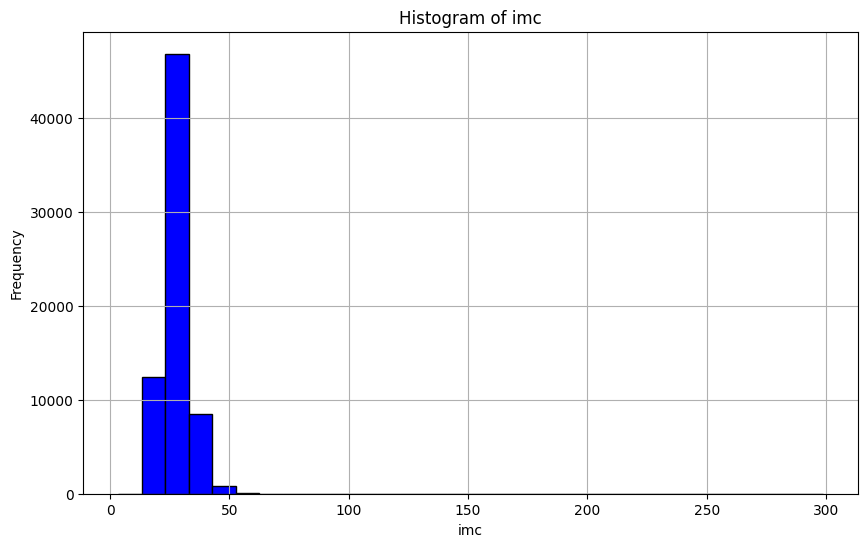

In [43]:
#verificando possíveis outliers da coluna IMC

plt.figure(figsize=(10, 6))
plt.hist(full_data['imc'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of imc')
plt.xlabel('imc')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


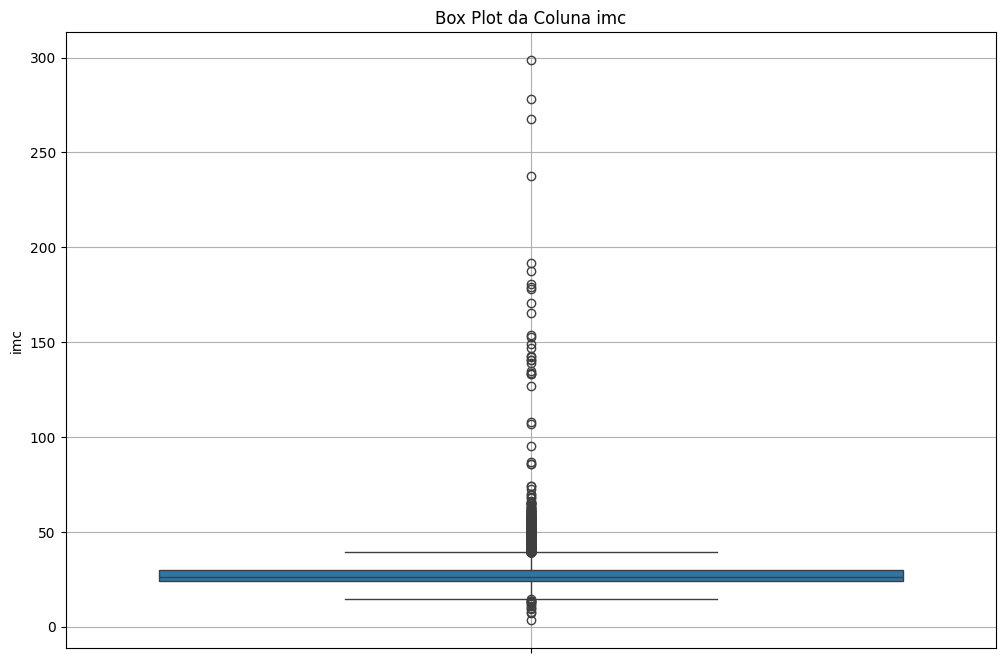

In [44]:

plt.figure(figsize=(12, 8))

# Criar o box plot
sns.boxplot(y=full_data['imc'])

# Adicionar título e rótulo
plt.title('Box Plot da Coluna imc')
plt.ylabel('imc')

# Ajustar o grid e mostrar o gráfico
plt.grid(True)
plt.show()

In [45]:
#retirando os ouliers do imc

# Definir limites específicos com base no conhecimento médico
lower_bound = 10  # Limite mínimo para valores viáveis de imc
upper_bound = 60  # Limite máximo razoável

# Filtrar os valores que estão fora desse intervalo
full_data = full_data[(full_data['imc'] >= lower_bound) & (full_data['imc'] <= upper_bound)]

In [46]:
#contando a quantidade de linhas depois de toda a limpeza
full_data.count()

,0
id,68611
age,68611
gender,68611
ap_hi,68611
ap_lo,68611
cholesterol,68611
gluc,68611
smoke,68611
alco,68611
active,68611


In [47]:
# convertendo as colunas categóricas em vetores binários
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Criação do codificador
encoder = OneHotEncoder(sparse=False)

# Ajuste e transformação dos dados
encoded_data = encoder.fit_transform(full_data[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']])

# Criação do DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Concatenar com o DataFrame original, excluindo as colunas categóricas originais
full_data = pd.concat([full_data.drop(['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active'], axis=1), encoded_df], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
full_data.head()

,id,age,ap_hi,ap_lo,cardio,imc,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,0.0,50.0,110.0,80.0,0.0,21.967120,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,55.0,140.0,90.0,1.0,34.927679,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2.0,52.0,130.0,70.0,1.0,23.507805,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,48.0,150.0,100.0,1.0,28.710479,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,4.0,48.0,100.0,60.0,0.0,23.011177,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [49]:
#retirando linhas com dados faltantes
full_data = full_data.dropna()

# Converter todas as colunas para int
full_data = full_data.astype(int)

# 3. Reconhecimento de Padrões

In [50]:
#Separando a verdade dos dados
X = full_data.drop('cardio', axis=1)
y = full_data['cardio']

# Padronizar os dados antes de procurar os melhores parâmetros
sc = StandardScaler()
X = sc.fit_transform(X)

## 3.1 Random Forest

In [51]:
# Encontrando os melhores hiperparâmetros com a função RandomizedSearchCV
# Dicionário de hiperparâmetros a serem testados na função RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  # Testar de 50 a 200 árvores
    'max_depth': [None, 10, 20, 30],  # Testar sem limite, profundidade 10, 20 e 30
    'min_samples_split': randint(2, 11),  # Testar de 2 a 10 amostras mínimas para dividir um nó
    'min_samples_leaf': randint(1, 5),  # Testar de 1 a 4 amostras mínimas em uma folha
    'bootstrap': [True, False],  # Testar com e sem bootstrap
    'criterion': ['gini', 'entropy'],  # Testar os critérios de divisão 'gini' e 'entropy'
    'max_leaf_nodes': [None, 10, 20, 30, 40],  # Testar com e sem limite de nós folha
    'min_impurity_decrease': [0.0, 0.01, 0.1]  # Testar diferentes valores para a redução mínima de impureza
}


In [52]:
# Inicializar o modelo de Random Forest
model = RandomForestClassifier(random_state=42)

# Configurar a busca aleatória com validação cruzada
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,  # Número de combinações a serem testadas
    scoring ='balanced_accuracy', # Usar acurácia balanceada como métrica de avaliação
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  # Validação cruzada com 5 folds
    random_state=42,
    n_jobs=-1  # Usar todos os núcleos disponíveis para acelerar o processo
)

# Ajustar a busca aleatória nos dados
random_search.fit(X, y)

# Exibir os melhores hiperparâmetros e a acurácia correspondente
print(f'Melhores hiperparâmetros: {random_search.best_params_}')
print(f'Melhor acurácia: {random_search.best_score_:.4f}')


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhores hiperparâmetros: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 165}
Melhor acurácia: 0.7207


In [53]:
#Separando a verdade dos dados
X = full_data.drop('cardio', axis=1)
y = full_data['cardio']

In [54]:
from sklearn.metrics import precision_score
# Melhores hiperparâmetros usando RandomizedSearchCV:
best_params=random_search.best_params_

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados antes de procurar os melhores parâmetros
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Configuração do K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista para armazenar as métricas de cada fold
accuracies = []
balanced_accuracies = []
recalls = []
f1_scores = []

# 3. Validação cruzada
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index] # Use array indexing for NumPy arrays
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Inicialize o modelo com os melhores hiperparâmetros
    model = RandomForestClassifier(**best_params, random_state=42)

    # Treine o modelo
    model.fit(X_train_fold, y_train_fold)

    # Faça predições no conjunto de validação
    y_pred = model.predict(X_val_fold)

    # Calcule e armazene as métricas
    accuracies.append(accuracy_score(y_val_fold, y_pred))
    balanced_accuracies.append(balanced_accuracy_score(y_val_fold, y_pred))
    recalls.append(recall_score(y_val_fold, y_pred))
    f1_scores.append(f1_score(y_val_fold, y_pred))

# Exiba as métricas médias dos 5 folds
print("Acurácia média:", np.mean(accuracies))
print("Acurácia Balanceada média:", np.mean(balanced_accuracies))
print("Recall médio:", np.mean(recalls))
print("F1-Score médio:", np.mean(f1_scores))

# 4. Treinando o modelo final com todos os dados de treino e avalie no conjunto de teste
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred_final = best_model.predict(X_test)


# Calcule a matriz de confusão e outras métricas finais
conf_matrix_rf = confusion_matrix(y_test, y_pred_final)
Acurácia_rf = accuracy_score(y_test, y_pred_final)
Acurácia_Balanceada_rf = balanced_accuracy_score(y_test, y_pred_final)
recall_score_rf = recall_score(y_test, y_pred_final)
precision_rf = precision_score(y_test, y_pred_final)
F1_Score_rf = f1_score(y_test, y_pred_final)

# Exiba as métricas formatadas
print(f'Accuracy: {Acurácia_rf:.4f}')
print(f'Balanced Accuracy: {Acurácia_Balanceada_rf:.4f}')
print(f'Recall: {recall_score_rf:.4f}')
print(f'Precision: {precision_rf:.4f}')
print(f'F1 Score: {F1_Score_rf:.4f}')
print('Confusion Matrix:')
print(conf_matrix_rf)



Acurácia média: 0.7214684014869889
Acurácia Balanceada média: 0.7208905071349919
Recall médio: 0.658988220173839
F1-Score médio: 0.7008202744118011
Accuracy: 0.7214
Balanced Accuracy: 0.7206
Recall: 0.6584
Precision: 0.7466
F1 Score: 0.6997
Confusion Matrix:
[[5338 1482]
 [2265 4366]]


## 3.2 Rede Neural

In [55]:
#Separando a verdade dos dados
X = full_data.drop('cardio', axis=1)
y = full_data['cardio']

# Padronizar os dados antes de procurar os melhores parâmetros
sc = StandardScaler()
X = sc.fit_transform(X)

In [56]:
# One-Hot Encoding na coluna 'cardio'
y = to_categorical(y)

# Função para criar o modelo
def create_model(optimizer='adam', units1=32, units2=32, dropout=0.5, activation='relu'):
    model = Sequential()
    model.add(Dense(units=units1, activation=activation, kernel_initializer='he_normal', input_shape=(X.shape[1],)))
    model.add(Dropout(dropout))
    model.add(Dense(units=units2, activation=activation, kernel_initializer='he_normal'))
    model.add(Dropout(dropout))
    model.add(Dense(units=2, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Criar o modelo para KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=2)

param_dist = {
    'optimizer': ['adam', 'sgd'],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30],
    'units1': [16, 32, 64],
    'units2': [16, 32, 64],
    'dropout': [0.2, 0.3, 0.5],
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=5, cv=3, verbose=2, random_state=42)
random_search_result = random_search.fit(X, y)

# Melhores parâmetros encontrados
print("Melhores parâmetros encontrados:", random_search_result.best_params_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


<ipython-input-56-d2bf41e46ab1>:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=2)


Epoch 1/30
701/701 - 2s - loss: 0.6493 - accuracy: 0.6544 - 2s/epoch - 3ms/step
Epoch 2/30
701/701 - 1s - loss: 0.5941 - accuracy: 0.6930 - 1s/epoch - 2ms/step
Epoch 3/30
701/701 - 2s - loss: 0.5848 - accuracy: 0.7064 - 2s/epoch - 2ms/step
Epoch 4/30
701/701 - 2s - loss: 0.5796 - accuracy: 0.7107 - 2s/epoch - 2ms/step
Epoch 5/30
701/701 - 2s - loss: 0.5788 - accuracy: 0.7127 - 2s/epoch - 2ms/step
Epoch 6/30
701/701 - 1s - loss: 0.5777 - accuracy: 0.7129 - 1s/epoch - 2ms/step
Epoch 7/30
701/701 - 1s - loss: 0.5722 - accuracy: 0.7177 - 1s/epoch - 2ms/step
Epoch 8/30
701/701 - 1s - loss: 0.5725 - accuracy: 0.7185 - 996ms/epoch - 1ms/step
Epoch 9/30
701/701 - 1s - loss: 0.5722 - accuracy: 0.7180 - 1000ms/epoch - 1ms/step
Epoch 10/30
701/701 - 1s - loss: 0.5714 - accuracy: 0.7181 - 1s/epoch - 1ms/step
Epoch 11/30
701/701 - 1s - loss: 0.5698 - accuracy: 0.7197 - 995ms/epoch - 1ms/step
Epoch 12/30
701/701 - 1s - loss: 0.5688 - accuracy: 0.7189 - 988ms/epoch - 1ms/step
Epoch 13/30
701/701 - 1s

In [80]:
#Separando a verdade dos dados
X = full_data.drop('cardio', axis=1)
y = full_data['cardio']

In [81]:
# One-Hot Encoding na coluna 'cardio'
y = to_categorical(y)

# Separar em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Criar o modelo para KerasClassifier com os melhores parâmetros encontrados
best_params = random_search_result.best_params_
model = KerasClassifier(build_fn=create_model, **best_params, verbose=2)

# Definir os callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Armazenar histórico de treinamento
history_list = []

# Aplicar K-Fold Cross-Validation no conjunto de treino
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_train_pred = np.array([])  # Para armazenar as previsões
y_train_true = np.array([])  # Para armazenar os rótulos verdadeiros

for train_index, val_index in kfold.split(X_train, np.argmax(y_train, axis=1)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Ajustar o modelo e registrar o histórico de treinamento com callbacks
    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=best_params['epochs'],
        batch_size=best_params['batch_size'],
        verbose=2,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[reduce_lr, early_stopping]
    )
    history_list.append(history.history)

    y_train_pred_fold = model.predict(X_val_fold)
    y_train_pred = np.concatenate((y_train_pred, y_train_pred_fold))
    y_train_true = np.concatenate((y_train_true, np.argmax(y_val_fold, axis=1)))

# Treinar o modelo com os melhores parâmetros no conjunto de treino completo
history_final = model.fit(
    X_train,
    y_train,
    epochs=best_params['epochs'],
    batch_size=best_params['batch_size'],
    verbose=2,
    callbacks=[reduce_lr, early_stopping]
)

# Salvar o histórico final para plotagem
history_dict = history_final.history

# Previsões no conjunto de teste
y_test_pred_prob = model.predict_proba(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Converter rótulos originais de volta a binário para as métricas
y_test_true = np.argmax(y_test, axis=1)

# Calcular as métricas no conjunto de teste
Acurácia_rn = accuracy_score(y_test_true, y_test_pred)
Acurácia_Balanceada_rn = balanced_accuracy_score(y_test_true, y_test_pred)
recall_score_rn = recall_score(y_test_true, y_test_pred, average='macro')
precision_rn = precision_score(y_test_true, y_test_pred, average='macro')
F1_Score_rn = f1_score(y_test_true, y_test_pred, average='macro')
conf_matrix_rn = confusion_matrix(y_test_true, y_test_pred)

# Imprimir as métricas
print(f'Accuracy: {Acurácia_rn:.4f}')
print(f'Balanced Accuracy: {Acurácia_Balanceada_rn:.4f}')
print(f'Recall: {recall_score_rn:.4f}')
print(f'Precision: {precision_rn:.4f}')
print(f'F1 Score: {F1_Score_rn:.4f}')
print('Confusion Matrix:')
print(conf_matrix_rn)


<ipython-input-81-29f35daf8ae4>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, **best_params, verbose=2)


Epoch 1/30
673/673 - 4s - loss: 0.6785 - accuracy: 0.6452 - val_loss: 0.5777 - val_accuracy: 0.7076 - lr: 0.0010 - 4s/epoch - 6ms/step
Epoch 2/30
673/673 - 2s - loss: 0.5949 - accuracy: 0.6943 - val_loss: 0.5669 - val_accuracy: 0.7137 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 3/30
673/673 - 1s - loss: 0.5851 - accuracy: 0.7056 - val_loss: 0.5636 - val_accuracy: 0.7167 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 4/30
673/673 - 1s - loss: 0.5803 - accuracy: 0.7105 - val_loss: 0.5613 - val_accuracy: 0.7185 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 5/30
673/673 - 1s - loss: 0.5770 - accuracy: 0.7148 - val_loss: 0.5585 - val_accuracy: 0.7176 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 6/30
673/673 - 1s - loss: 0.5756 - accuracy: 0.7152 - val_loss: 0.5571 - val_accuracy: 0.7196 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 7/30
673/673 - 2s - loss: 0.5734 - accuracy: 0.7168 - val_loss: 0.5596 - val_accuracy: 0.7180 - lr: 0.0010 - 2s/epoch - 3ms/step
Epoch 8/30
673/673 - 2s - loss: 0.5719 - accuracy: 0.71

841/841 - 2s - loss: 0.6305 - accuracy: 0.6666 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 2/30


841/841 - 1s - loss: 0.5895 - accuracy: 0.7018 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 3/30


841/841 - 1s - loss: 0.5801 - accuracy: 0.7107 - lr: 0.0010 - 1s/epoch - 1ms/step
Epoch 4/30


841/841 - 1s - loss: 0.5774 - accuracy: 0.7136 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 5/30


841/841 - 2s - loss: 0.5744 - accuracy: 0.7157 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 6/30


841/841 - 2s - loss: 0.5727 - accuracy: 0.7174 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 7/30


841/841 - 1s - loss: 0.5717 - accuracy: 0.7187 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 8/30


841/841 - 1s - loss: 0.5702 - accuracy: 0.7178 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 9/30


841/841 - 1s - loss: 0.5688 - accuracy: 0.7187 - lr: 0.0010 - 1s/epoch - 1ms/step
Epoch 10/30


841/841 - 1s - loss: 0.5675 - accuracy: 0.7188 - lr: 0.0010 - 1s/epoch - 1ms/step
Epoch 11/30


841/841 - 1s - loss: 0.5680 - accuracy: 0.7195 - lr: 0.0010 - 1s/epoch - 1ms/step
Epoch 12/30


841/841 - 1s - loss: 0.5667 - accuracy: 0.7205 - lr: 0.0010 - 1s/epoch - 1ms/step
Epoch 13/30


841/841 - 1s - loss: 0.5662 - accuracy: 0.7186 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 14/30


841/841 - 1s - loss: 0.5659 - accuracy: 0.7198 - lr: 0.0010 - 1s/epoch - 1ms/step
Epoch 15/30


841/841 - 2s - loss: 0.5654 - accuracy: 0.7207 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 16/30


841/841 - 2s - loss: 0.5655 - accuracy: 0.7197 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 17/30


841/841 - 2s - loss: 0.5653 - accuracy: 0.7206 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 18/30


841/841 - 1s - loss: 0.5644 - accuracy: 0.7209 - lr: 0.0010 - 1s/epoch - 1ms/step
Epoch 19/30


841/841 - 1s - loss: 0.5641 - accuracy: 0.7209 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 20/30


841/841 - 1s - loss: 0.5633 - accuracy: 0.7206 - lr: 0.0010 - 1s/epoch - 1ms/step
Epoch 21/30


841/841 - 1s - loss: 0.5640 - accuracy: 0.7209 - lr: 0.0010 - 1s/epoch - 1ms/step
Epoch 22/30


841/841 - 1s - loss: 0.5632 - accuracy: 0.7213 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 23/30


841/841 - 1s - loss: 0.5636 - accuracy: 0.7215 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 24/30


841/841 - 1s - loss: 0.5641 - accuracy: 0.7209 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 25/30


841/841 - 2s - loss: 0.5631 - accuracy: 0.7221 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 26/30


841/841 - 2s - loss: 0.5626 - accuracy: 0.7213 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 27/30


841/841 - 2s - loss: 0.5620 - accuracy: 0.7215 - lr: 0.0010 - 2s/epoch - 2ms/step
Epoch 28/30


841/841 - 1s - loss: 0.5628 - accuracy: 0.7210 - lr: 0.0010 - 1s/epoch - 2ms/step
Epoch 29/30


841/841 - 1s - loss: 0.5634 - accuracy: 0.7220 - lr: 0.0010 - 1s/epoch - 1ms/step
Epoch 30/30


841/841 - 1s - loss: 0.5614 - accuracy: 0.7207 - lr: 0.0010 - 1s/epoch - 2ms/step
421/421 [==============================] - 1s 1ms/step
Accuracy: 0.7229
Balanced Accuracy: 0.7223
Recall: 0.7223
Precision: 0.7240
F1 Score: 0.7222
Confusion Matrix:
[[5206 1614]
 [2113 4518]]


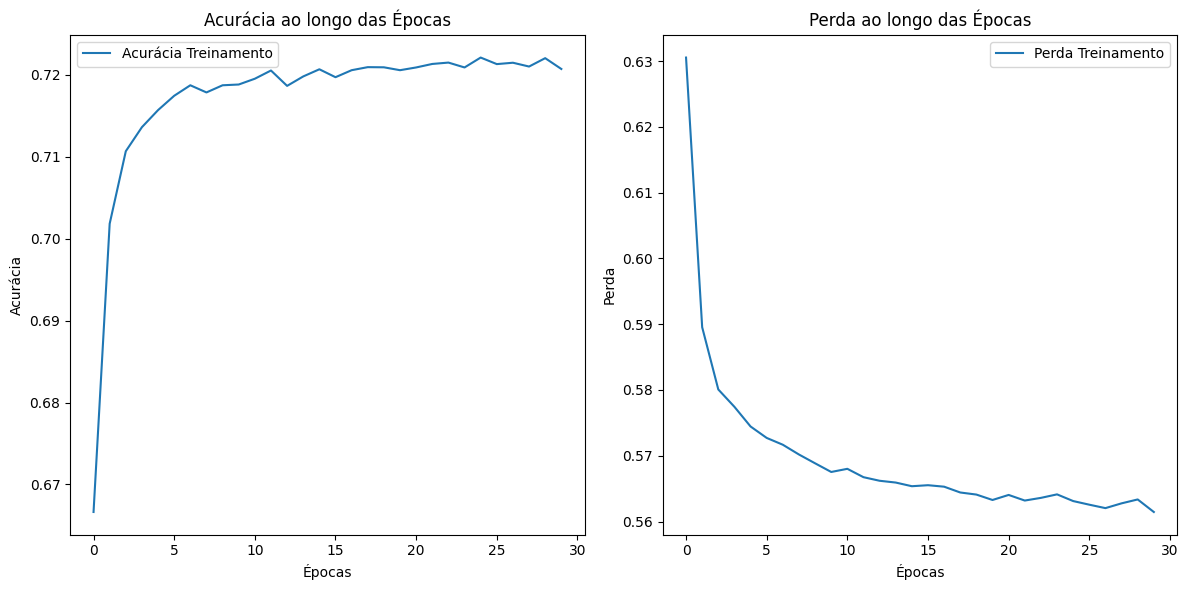

In [95]:

# Plotar a acurácia
plt.figure(figsize=(12, 6))

# Acurácia no conjunto de treino
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Acurácia Treinamento')
if 'val_accuracy' in history_dict:
    plt.plot(history_dict['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia ao longo das Épocas')
plt.legend()

# Perda (loss) no conjunto de treino
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Perda Treinamento')
if 'val_loss' in history_dict:
    plt.plot(history_dict['val_loss'], label='Perda Validação')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda ao longo das Épocas')
plt.legend()

plt.tight_layout()
plt.show()



## 3.3 Árvore de Decisão

In [59]:
#Separando a verdade dos dados
X = full_data.drop('cardio', axis=1)
y = full_data['cardio']

# Padronizar os dados antes de procurar os melhores parâmetros
sc = StandardScaler()
X = sc.fit_transform(X)

In [60]:
# Definindo a grade de parâmetros para o DecisionTreeClassifier
param_dist = {
    'max_depth': [None, 10, 20, 30],  # Testar sem limite, profundidade 10, 20 e 30
    'min_samples_split': randint(2, 11),  # Testar de 2 a 10 amostras mínimas para dividir um nó
    'min_samples_leaf': randint(1, 5),  # Testar de 1 a 4 amostras mínimas em uma folha
    'criterion': ['gini', 'entropy'],  # Testar os critérios de divisão 'gini' e 'entropy'
    'max_features': [None, 'auto', 'sqrt', 'log2'],  # Testar diferentes limites de características para procurar o melhor split
    'max_leaf_nodes': [None, 10, 20, 30, 40],  # Testar com e sem limite de nós folha
    'min_impurity_decrease': [0.0, 0.01, 0.1]  # Testar diferentes valores para a redução mínima de impureza
}


In [61]:
# Inicializar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)

# Configurar a busca aleatória com validação cruzada
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=100,  # Número de combinações a serem testadas
    scoring='balanced_accuracy',  # Usar acurácia balanceada como métrica de avaliação
    cv=KFold(n_splits=5, shuffle=True, random_state=42),  # Validação cruzada com 5 folds
    random_state=42,
    n_jobs=-1  # Usar todos os núcleos disponíveis para acelerar o processo
)

# Ajustar a busca aleatória nos dados
random_search.fit(X, y)

# Exibir os melhores hiperparâmetros e a acurácia correspondente
print(f'Melhores hiperparâmetros: {random_search.best_params_}')
print(f'Melhor acurácia balanceada: {random_search.best_score_:.4f}')


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklea

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': 40, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 9}
Melhor acurácia balanceada: 0.7197


In [62]:
#Separando a verdade dos dados
X = full_data.drop('cardio', axis=1)
y = full_data['cardio']

In [63]:
# Melhores hiperparâmetros usando RandomizedSearchCV:
best_params = random_search.best_params_

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Configuração do K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Listas para armazenar as métricas de cada fold
accuracies = []
balanced_accuracies = []
recalls = []
f1_scores = []

# Validação cruzada
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]  # Use array indexing for NumPy arrays
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Inicialize o modelo DecisionTreeClassifier com os melhores hiperparâmetros
    model = DecisionTreeClassifier(**best_params, random_state=42)

    # Treine o modelo
    model.fit(X_train_fold, y_train_fold)

    # Faça predições no conjunto de validação
    y_pred = model.predict(X_val_fold)

    # Calcule e armazene as métricas
    accuracies.append(accuracy_score(y_val_fold, y_pred))
    balanced_accuracies.append(balanced_accuracy_score(y_val_fold, y_pred))
    recalls.append(recall_score(y_val_fold, y_pred))
    f1_scores.append(f1_score(y_val_fold, y_pred))

# Exiba as métricas médias dos 5 folds
print("Acurácia média:", np.mean(accuracies))
print("Acurácia Balanceada média:", np.mean(balanced_accuracies))
print("Recall médio:", np.mean(recalls))
print("F1-Score médio:", np.mean(f1_scores))

# Treinando o modelo final com todos os dados de treino e avalie no conjunto de teste
best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred_final = best_model.predict(X_test)

# Calcule a matriz de confusão e outras métricas finais
conf_matrix_ad = confusion_matrix(y_test, y_pred_final)
Acurácia_ad = accuracy_score(y_test, y_pred_final)
Acurácia_Balanceada_ad = balanced_accuracy_score(y_test, y_pred_final)
recall_score_ad = recall_score(y_test, y_pred_final)
precision_ad = precision_score(y_test, y_pred_final)
F1_Score_ad = f1_score(y_test, y_pred_final)

# Exiba as métricas formatadas
print(f'Accuracy: {Acurácia_ad:.4f}')
print(f'Balanced Accuracy: {Acurácia_Balanceada_ad:.4f}')
print(f'Recall: {recall_score_ad:.4f}')
print(f'Precision: {precision_ad:.4f}')
print(f'F1 Score: {F1_Score_ad:.4f}')
print('Confusion Matrix:')
print(conf_matrix_ad)

Acurácia média: 0.7215055762081785
Acurácia Balanceada média: 0.7210941372553041
Recall médio: 0.6656312329404622
F1-Score médio: 0.7028520640701673
Accuracy: 0.7212
Balanced Accuracy: 0.7206
Recall: 0.6804
Precision: 0.7345
F1 Score: 0.7064
Confusion Matrix:
[[5189 1631]
 [2119 4512]]


# 4. Ánalises de resultados

## 4.1 Gráfico com as métricas

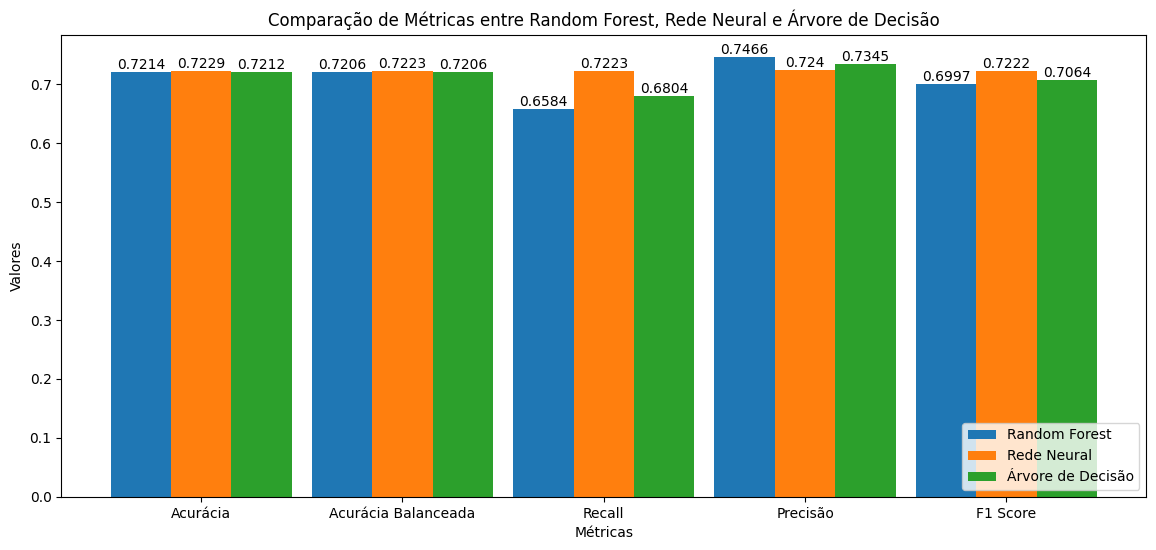

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Dados para o gráfico
metrics_rf = [Acurácia_rf, Acurácia_Balanceada_rf, recall_score_rf, precision_rf, F1_Score_rf]
metrics_rn = [Acurácia_rn, Acurácia_Balanceada_rn, recall_score_rn, precision_rn, F1_Score_rn]
metrics_ad = [Acurácia_ad, Acurácia_Balanceada_ad, recall_score_ad, precision_ad, F1_Score_ad]

metric_names = ['Acurácia', 'Acurácia Balanceada', 'Recall', 'Precisão', 'F1 Score']
x = np.arange(len(metric_names))
width = 0.3  # Ajuste a largura das barras para acomodar todas as métricas

# Criação do gráfico de barras com tamanho ajustado
fig, ax = plt.subplots(figsize=(14, 6))  # Ajuste o tamanho conforme necessário

bars_rf = ax.bar(x - width, metrics_rf, width, label='Random Forest')
bars_rn = ax.bar(x, metrics_rn, width, label='Rede Neural')
bars_ad = ax.bar(x + width, metrics_ad, width, label='Árvore de Decisão')

# Adicionar legendas e títulos
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparação de Métricas entre Random Forest, Rede Neural e Árvore de Decisão')
ax.set_xticks(x)
ax.set_xticklabels(metric_names)
ax.legend(loc='lower right')

# Adicionar valores no topo das barras
def add_values(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

add_values(bars_rf)
add_values(bars_rn)
add_values(bars_ad)

# Mostrar o gráfico
plt.show()


##4.2 Matriz de confusão dos modelos

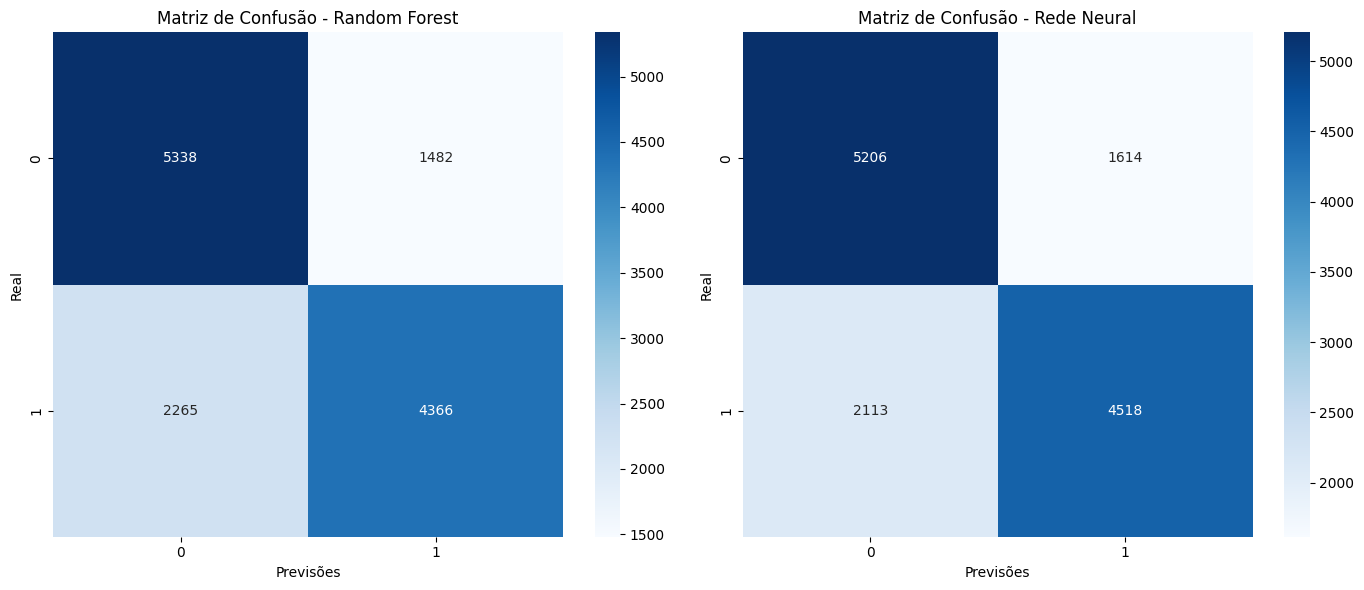

In [97]:
# Configurações para o gráfico
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotando a matriz de confusão do Random Forest
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Matriz de Confusão - Random Forest')
ax[0].set_xlabel('Previsões')
ax[0].set_ylabel('Real')

# Plotando a matriz de confusão da Rede Neural
sns.heatmap(conf_matrix_rn, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Matriz de Confusão - Rede Neural')
ax[1].set_xlabel('Previsões')
ax[1].set_ylabel('Real')


# Mostrar os gráficos
plt.tight_layout()
plt.show()

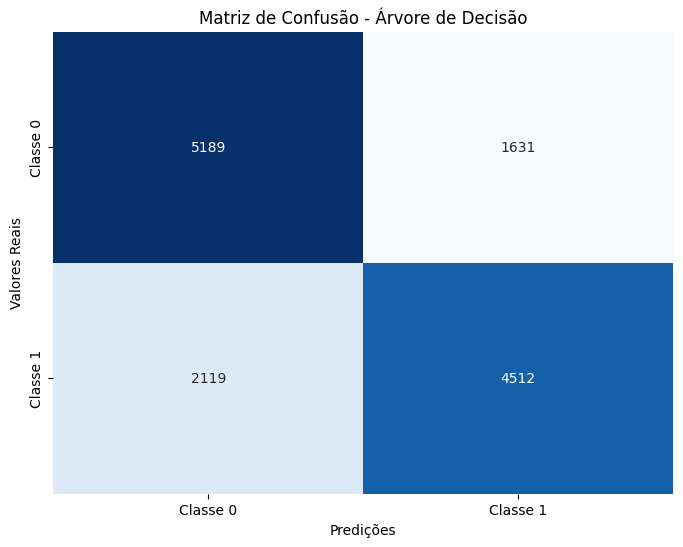

In [96]:
# Configurando o gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ad, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])

plt.xlabel('Predições')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.show()